# Objectives:

- Develop river stage and flow duration curves
- Use three methods
 - Exceedence Equation
 - Arithmetic Binning
 - Logarimic Binnin

1.) Select site and check that 25 years of data is available

USGS Site Identifier: 7381495 
Location: Atchafalaya River at Melville, LA

This is my site from homework 1, so it looks the same.

First I looked at the comments (turning off for saving this notebook):

In [1]:
#!head -n 17 thebes_daily_data.tsv

The column headers start are on line 16, so I'll read in the data frame from there:

In [2]:
import pandas
f = pandas.read_table("thebes_daily_data.tsv",header=16).dropna(axis=1,how='all')
f.head()

,agency_cd,site_no,datetime,DAILY_FLOW,DAILY_FLOW_QUAL,DAILY_SSC,DAILY_SSC_QUAL,DAILY_SSL,DAILY_SSL_QUAL
0,USGS,7022000,1933-04-01,191000,A,NaN,NaN,NaN,NaN
1,USGS,7022000,1933-04-02,224000,A,NaN,NaN,NaN,NaN
2,USGS,7022000,1933-04-03,257000,A,NaN,NaN,NaN,NaN
3,USGS,7022000,1933-04-04,279000,A,NaN,NaN,NaN,NaN
4,USGS,7022000,1933-04-05,298000,A,NaN,NaN,NaN,NaN


The time period covered is almost 100 years:

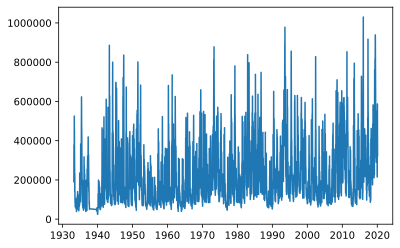

In [3]:
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
f.datetime = pandas.to_datetime(f.datetime)
plt.plot(f.datetime,f.DAILY_FLOW);

In [4]:
#!head -n51 thebes_discrete_data.tsv

In [5]:
import pandas
f2 = pandas.read_table("thebes_discrete_data.tsv",header=52).dropna(axis=1,how='all')
f2.head().dropna(axis=1,how='all')

,SITE_NO,STATION_NM,DATETIME,DCOMMENT,ICOMMENT,SSC,DAILYFLOW,SS,TURB70,TEMPC,SC,DSS,PH
0,7022000,"MISSISSIPPI RIVER AT THEBES, IL",1973-01-30 10:30:00,G,S,306,369000,NaN,NaN,1.5,435.0,NaN,7.8
1,7022000,"MISSISSIPPI RIVER AT THEBES, IL",1973-02-21 10:50:00,G,S,436,237000,NaN,NaN,2.0,430.0,NaN,7.7
2,7022000,"MISSISSIPPI RIVER AT THEBES, IL",1973-06-21 11:00:00,G,S,468,408000,520.0,NaN,25.5,435.0,310.0,7.8
3,7022000,"MISSISSIPPI RIVER AT THEBES, IL",1973-07-18 09:30:00,G,S,227,179000,210.0,50.0,28.0,640.0,370.0,7.8
4,7022000,"MISSISSIPPI RIVER AT THEBES, IL",1973-08-14 10:00:00,G,S,211,208000,130.0,40.0,26.0,545.0,330.0,8.1


In [6]:
f2.columns

Index(['SITE_NO', 'STATION_NM', 'DATETIME', 'DCOMMENT', 'ICOMMENT', 'SSC',
       'DAILYFLOW', 'INSTFLOW', 'GH', 'P2', 'P4', 'P8', 'P16', 'P31', 'P63',
       'P125', 'P250', 'P500', 'P1MILLI', 'SS', 'AGENCYCODE', 'SAMPMETHOD',
       'SAMPLEPURPOSE', 'SAMPTYPE', 'NUMBERSAMPPTS', 'WIDTH', 'VELOCITY',
       'TURB70', 'TURB76', 'TURB63675', 'TURB63676', 'TEMPC', 'TEMPAIRC', 'SC',
       'SCLAB', 'DSS', 'PH', 'PHLAB'],
      dtype='object')

Text(0, 0.5, 'Gage Height [f]')

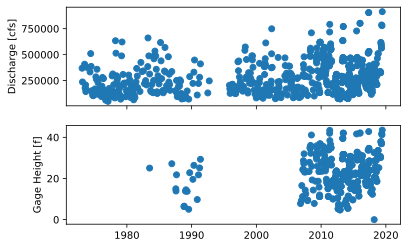

In [7]:
import numpy as np
f2.DATETIME = pandas.to_datetime(f2.DATETIME)
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].scatter(f2.DATETIME,f2.DAILYFLOW)
ax[0].set_ylabel('Discharge [cfs]')
gh_clean=[]
for gh in f2.GH:
    if type(gh) == float:
        gh_clean.append(gh)
    else:
        if 'E' in gh:
            gh_clean.append(float(gh[1:].strip()))
        else:
            gh_clean.append(float(gh.strip()))
f2.GH = np.array(gh_clean)
ax[1].scatter(f2.DATETIME,f2.GH)
ax[1].set_ylabel('Gage Height [f]')

# Discharge Histograms for Daily Flow Records

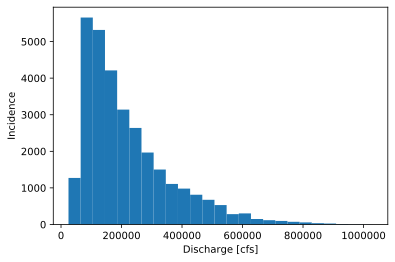

In [8]:
(n,bins,patches) = plt.hist(f.DAILY_FLOW,bins=25)
plt.ylabel('Incidence')
plt.xlabel('Discharge [cfs]');

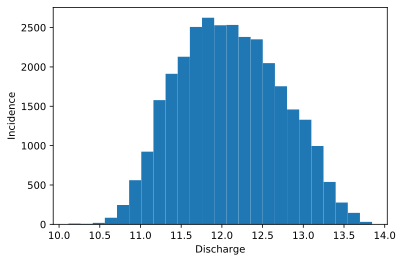

In [9]:
(nlog,binslog,patcheslog) = plt.hist(np.log(f.DAILY_FLOW),bins=25)
plt.ylabel('Incidence')
plt.xlabel('Discharge');

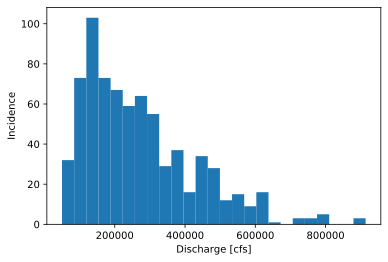

In [10]:
(n,bins,patches) = plt.hist(f2.DAILYFLOW,bins=25)
plt.ylabel('Incidence')
plt.xlabel('Discharge [cfs]');

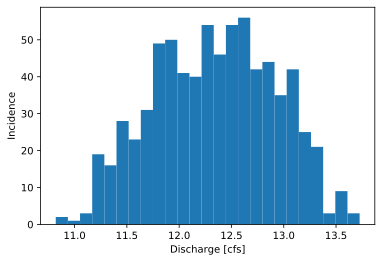

In [11]:
(n,bins,patches) = plt.hist(np.log(f2.DAILYFLOW),bins=25)
plt.ylabel('Incidence')
plt.xlabel('Discharge [cfs]');

Check if the daily flow over just the last ten years looks more like the discrete data

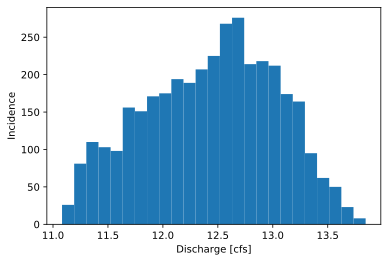

In [12]:
df = np.array(f.DAILY_FLOW)
(n,bins,patches) = plt.hist(np.log(df[-365*10:]),bins=25)
plt.ylabel('Incidence')
plt.xlabel('Discharge [cfs]');

In [13]:
f.DAILY_FLOW.dropna(axis=0,inplace=True)
flowsorted = np.sort(f.DAILY_FLOW)[::-1]
f2.DAILYFLOW.dropna(axis=0,inplace=True)
flowsorted_discrete = np.sort(f2.DAILYFLOW)[::-1]
P = 100.0 * (np.arange(1,flowsorted.shape[0]+1)/(flowsorted.shape[0]+1))
P_discrete = 100.0 * (np.arange(1,flowsorted_discrete.shape[0]+1)/(flowsorted_discrete.shape[0]+1))
(P.max(),P.min())

(99.9967712772827, 0.0032287227172930386)

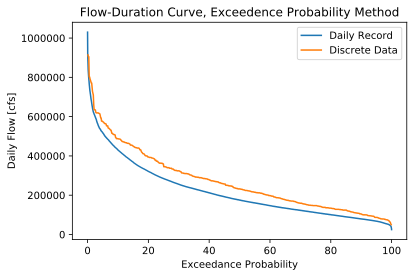

In [14]:
plt.plot(P,flowsorted,P_discrete,flowsorted_discrete)
plt.xlabel('Exceedance Probability')
plt.ylabel('Daily Flow [cfs]')
plt.legend(['Daily Record','Discrete Data'])
plt.title('Flow-Duration Curve, Exceedence Probability Method');

## Binning methods

I'll just use the matplotlib histogram routine to build cummulative distribution functions.

Text(0.5, 0, 'Daily Flow (cfs)')

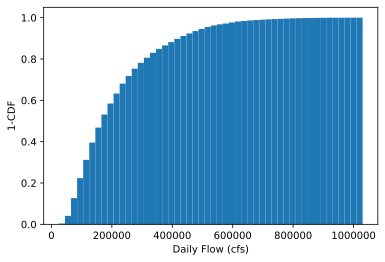

In [15]:
flowcdf = plt.hist(f.DAILY_FLOW,cumulative=True,bins=50,density=True)
plt.ylabel('1-CDF')
plt.xlabel('Daily Flow (cfs)')

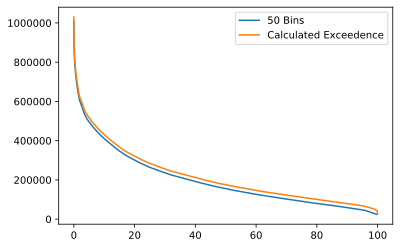

In [16]:
plt.plot(100*(1.0-flowcdf[0][:]),flowcdf[1][:-1],P,flowsorted)
plt.legend(['50 Bins','Calculated Exceedence']);

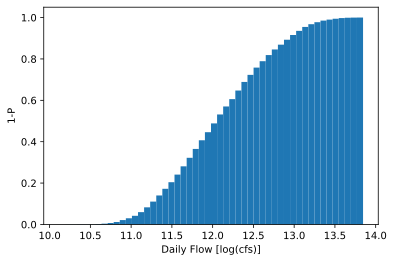

In [17]:
logflowcdf = plt.hist(np.log(f.DAILY_FLOW),cumulative=True,bins=50,density=True)
plt.ylabel('1-P')
plt.xlabel('Daily Flow [log(cfs)]');

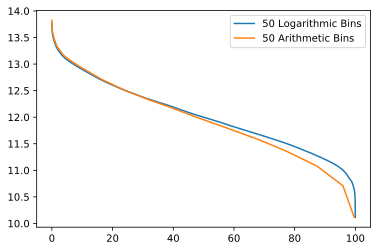

In [18]:
plt.plot(100*(1.0-logflowcdf[0][:]),logflowcdf[1][:-1],100*(1.0-flowcdf[0][:]),np.log(flowcdf[1][:-1]))
plt.legend(['50 Logarithmic Bins','50 Arithmetic Bins']);

# Stage-Duration Curve

0.26595744680851063 99.7340425531915


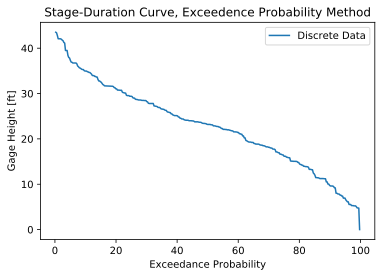

In [19]:
f2.GH.dropna(axis=0,inplace=True)
gagesorted = np.sort(f2.GH)[::-1]
PGAGE = 100.0 * (np.arange(1,gagesorted.shape[0]+1)/(gagesorted.shape[0]+1))
print(PGAGE.min(),PGAGE.max())
plt.figure()
plt.plot(PGAGE,gagesorted)
plt.xlabel('Exceedance Probability')
plt.ylabel('Gage Height [ft]')
plt.legend(['Discrete Data'])
plt.title('Stage-Duration Curve, Exceedence Probability Method');

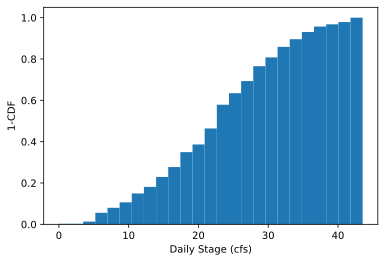

In [20]:
stagecdf = plt.hist(f2.GH,cumulative=True,bins=25,density=True)
plt.ylabel('1-CDF')
plt.xlabel('Daily Stage (cfs)');

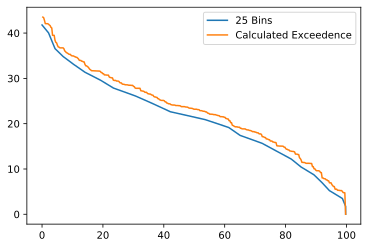

In [21]:
plt.plot(100*(1.0-stagecdf[0][:]),stagecdf[1][:-1],PGAGE,gagesorted)
plt.legend(['25 Bins','Calculated Exceedence']);